In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from lib.ekyn import *
from lib.env import *
import copy
from sage.utils import *

MODEL_ID = f'2024_28_08_16_25_46'

for experiments in [EXPERIMENTS_PATH,BEAST_EXPERIMENTS_PATH,BEAUTY_EXPERIMENTS_PATH]:
    if not os.path.exists(f'{experiments}/{MODEL_ID}/state.pt'):
        continue
    print(experiments)
    state = torch.load(f'{experiments}/{MODEL_ID}/state.pt',map_location='cpu',weights_only=False)
    model = copy.deepcopy(state['model'])
    model.load_state_dict(state['best_model_wts'])

    trainloader,testloader = get_sequenced_dataloaders(
        batch_size=32,
        sequence_length=state['sequence_length'],
        )
    loss,y_true,y_pred = evaluate(dataloader=testloader,model=model,criterion=state['criterion'],device='cuda')

/home/andrew/sleep/experiments_beauty


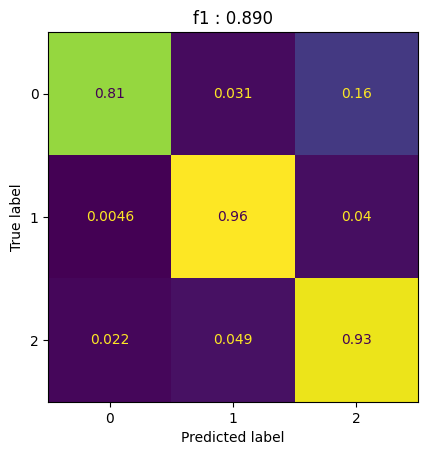

In [5]:
ConfusionMatrixDisplay.from_predictions(y_true,y_pred,normalize='true',colorbar=False)
plt.title(f'f1 : {f1_score(y_true,y_pred,average="macro"):.3f}')
plt.savefig('dumbledore_a11.jpg')